# Diferentes cadenas de Markov y diferentes cantidades

Todos los problemas se preguntan para las siguientes cadenas de Markov:

- Ruina del jugador
- Caminata aleatoria
- Crecimiento poblacional
- Urna de Ehrenfest

In [24]:
from tqdm.notebook import tqdm as tqm
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

# Opciones de matplotlib
rc=plt.rcParams
rc['figure.figsize']=[15,5]

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## 1. Simulacion de las cadenas



## 1.2 Probabilidad de transición

Para cada una de las cadenas previamente mencionadas, crea la función de transición; es decir aquella que nos da la probabilidad de pasar del estado $i$ al $j$. También puede servir definir funciones que creen las matrices de transición (para casos finitos)

Desde la perspectiva del Casino la persona puede tener una cantidad de dinero iniciale entre 0 y $d$.

La matriz de transición está dada por

$$
P_{ij}=\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 \\
1-p & 0 & p & \cdots & 0 \\
0 & 1-p & 0 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & p \\
0 & \cdots & 0 & 0 & 1
\end{pmatrix}
$$


In [17]:
# Ruina del jugador
import numpy as np

def gen_matriz(N, p):
    # Inicializa una matriz de (N+1) x (N+1) llena de ceros
    matrix = np.zeros((N+1, N+1))

    # Estados absorbentes
    matrix[0, 0] = 1
    matrix[N, N] = 1

    # Rellenamos los elementos a cada lado de la diagonal
    for i in range(1, N):
        matrix[i, i-1] = 1 - p  # Probabilidad de perder
        matrix[i, i+1] = p  # Probabilidad de ganar

    return matrix

# Parámetros del problema
N = 10  # Dinero máximo, Tamaño de la matriz
p = 0.6  # Probabilidad de ganar

Pij = gen_matriz(N, p)
print(Pij)


[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.4 0.  0.6 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.4 0.  0.6 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.6 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.4 0.  0.6 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.4 0.  0.6 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.4 0.  0.6 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.6 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.6]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


esta representación es ineficiente porque guarda muchos ceros iguales. No importa por lo pronto, pero podría en el futuro dependiendo de lo que hagan.

### 1.1 Simulación paso a paso

Para cada una de las cadenas previamente mencionadas, crea una función que dado un vector de probabilidades $\pi_{n}$ regresen la distribución de probabilidades en el siguiente paso $\pi_{n+1}$. Para la caminata aleatoria pueden obviar este paso

Supongamos que la mayoría de las personas tienen una alta probabilidad de llegar con poco dinero. Vamos a hacer una distribución exponencial para iniciar

In [30]:
pi_0=np.zeros(N+1)
pi_0[1:-1]=np.exp(-np.arange(1,N))
pi_0

array([0.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
       1.83156389e-02, 6.73794700e-03, 2.47875218e-03, 9.11881966e-04,
       3.35462628e-04, 1.23409804e-04, 0.00000000e+00])

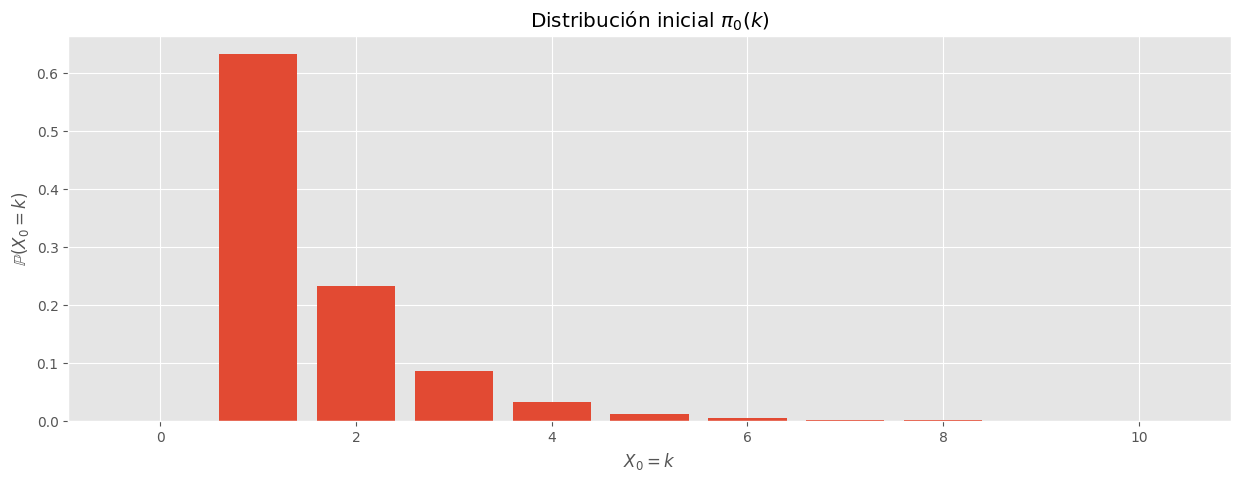

In [36]:
pi_0=np.zeros(N+1)
pi_0[1:-1]=np.exp(-np.arange(1,N)) # Primero hacemos una exponencial
pi_0=pi_0/pi_0.sum() # Luego normalizamos la distribución

# Agregamos el elemento 0 y el N
pi_0


plt.bar(np.arange(N+1),pi_0)
# plt.plot(np.linspace(1,N+1,100),np.exp(-np.linspace(1,N+1,100)),c='b')
plt.xlabel('$X_0=k$')
plt.ylabel('$\\mathbb{P}(X_0=k)$')
plt.title('Distribución inicial $\\pi_0(k)$')
plt.show()

De acuerdo a la teoría que hemos visto para conseguir la distribución de probabilidad de $X_1$ como  lo haríamos

$$\pi_1=\pi_0\cdot P $$

en numpy esto corresponde al producto punto denotado con @

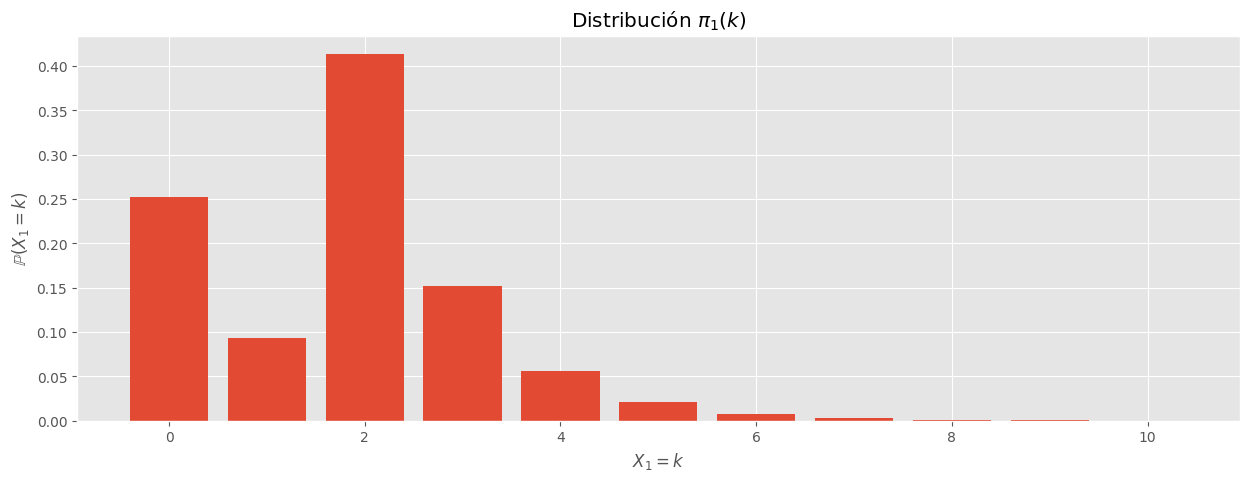

In [23]:
pi_1=pi_0@Pij #notación de np para producto matricial
plt.bar(np.arange(N+1),pi_1)
plt.xlabel('$X_1=k$')
plt.ylabel('$\\mathbb{P}(X_1=k)$')
plt.title('Distribución $\\pi_1(k)$')
plt.show()

In [37]:
pi_1.sum()

1.0

## 1.3 Simulación de variables aleatorias

Crear una función que dado un arreglo de estocástico simule una variable aleatoria de la función condicional

In [81]:
# Esto ya lo hemos visto previamente. Tenemos un arreglo de probabilidades y queremos simular de él

# Primero simulamos uniforme

# después vemos en que cubeta cae y devolvemos esa variable aleatoria
print(pi_1.cumsum())
u=np.random.random()

def simula_dado_pi(pi):
    u=np.random.random()
    mask=u < pi.cumsum()
    
    return mask.argmax()
simula_dado_pi(pi_1)

[0.25287943 0.34590858 0.75945123 0.91158507 0.96755199 0.98814106
 0.99571536 0.99850179 0.99952686 0.99987275 1.        ]


2

## 1.4 Simulación de la cadena

Tomando todas las funciones de pasos previos crea una función que simule toda la trayectoria de la cadena

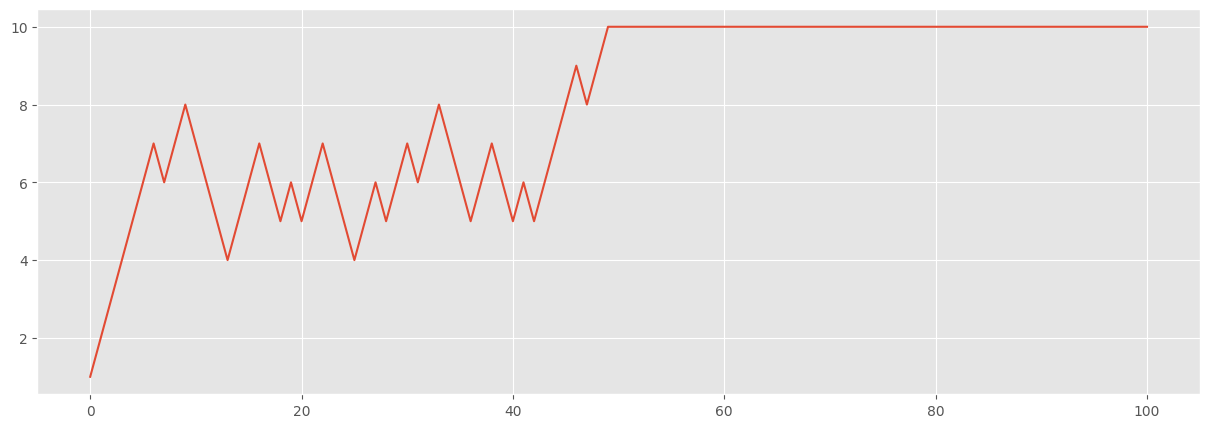

In [95]:
# Sólo hay que llamar los pasos previos una y otra vez

N_cadena=100

pi=pi_0
Xn=[simula_dado_pi(pi_0)]
for i in range(N_cadena):
    pi=np.zeros(N+1)
    pi[Xn[-1]]=1
    pi=pi@Pij
    Xi=simula_dado_pi(pi)

    Xn.append(Xi)

plt.plot(Xn)

# 2. Estimaciones de cantidades aleatorias

¿Cómo harías para ver si un estado es recurrente, transitivo o absorbente si no puedes simular infinitamente?

Desarrolla alguna visualización que nos pueda decir si un estado es recurrente, transitivo, etc.

Desarrolla una función que diga si dos  estados son parte de la misma clase de comunicación. 

Desarrolla una función que estime el tiempo de llegada dados dos estados.

Puedes calcular alguna cantidad interesante de las cadenas aleatorias? Por ejemplo, las personas promedio que se van a la quiebra o ganan?
